In [29]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [30]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "least_confident", "kmeans",10, 30, 0.01, "Adam",20])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

5


In [31]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "least_confident", "kmeans", 30, 0.01, 20])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

5


0    b4905a81187d4114a791df55769016c6
1    a6483000f4b341ac92e42cafe24b1572
2    24f973d5607b4a2f8072ced039a37b1f
3    4e5dbaed1b2541038a56a4f99813fad6
4    eb90fe20bc0e469ba57db23dccf75b51
Name: run_id, dtype: object

In [32]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "least_confident", "kmeans",1000, 30, 0.01, "Adam", 20])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

5


0    9698c939812b44519fcb6626ad00230c
1    1c03d0a6607a40d6860935a37fcf06b3
2    6e55d6e51fb441119b23cb65b1b49288
3    db9cf7ad92974b86b106c2e0057e08a8
4    db8e955b16804844ab31bb999b16d7aa
Name: run_id, dtype: object

In [33]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "kmeans",1000, 30, 0.01, 10, 20])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

5


0    3c8908b8242b427ca93f0a9ed7d84412
1    b32bbf8e07ab492c97b639af51d5b155
2    1399f3b8ca2a4292867e3968c42587c4
3    2868eed2f700464cb625c5e1ec6a53fe
4    ff72db549988469084e9bea613852b69
Name: run_id, dtype: object

In [34]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "least_confident", "kmeans",1000, 0.01, 30, 10, 20])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

5


0    08b3668ef45a4abba0251db83b1e71cb
1    92dad3830b33449390a262a4285447a5
2    4c02dac6e7204196a210a3213d239914
3    d8c3a4b885e04a88ace1ff2b7c4a5821
4    6c80a1869e4943f58eba43ab1c5d53d5
Name: run_id, dtype: object

In [35]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [36]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 20, "least_confident"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

5


0    04865de534e3485bbe25f9d05d4f75be
1    5a88130208a545ceb433f2073c03a52c
2    d4f6e9f137c4420885646fc35c9401e0
3    f4d8e05ca871493dabf379dd96b6b22b
4    b271c22c5a2b4729ba24f4c05ff5b286
Name: run_id, dtype: object

In [37]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

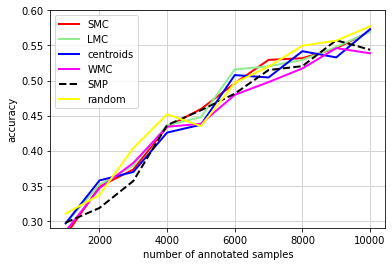

In [38]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

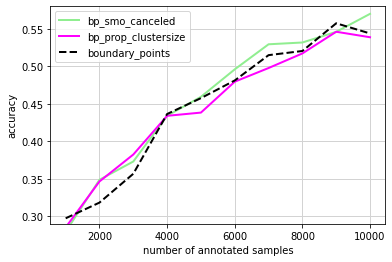

In [39]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [40]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.27948 0.34872 0.3731  0.43406 0.45936 0.496   0.52942 0.5318  0.54602
 0.57002]
bp_lmo: [0.29602 0.35152 0.37862 0.4363  0.44774 0.51574 0.5202  0.52934 0.54788
 0.56944]


In [41]:
avg_accs_centroids

array([0.29642, 0.35754, 0.3696 , 0.4258 , 0.43694, 0.50774, 0.50432,
       0.54178, 0.53292, 0.57312])

In [42]:
avg_accs_boundary

array([0.29734, 0.31828, 0.35672, 0.43642, 0.45762, 0.48116, 0.51494,
       0.52048, 0.55742, 0.54386])

In [43]:
avg_accs_bp_smo

array([0.27948, 0.34872, 0.3731 , 0.43406, 0.45936, 0.496  , 0.52942,
       0.5318 , 0.54602, 0.57002])

In [44]:
avg_accs_bp_lmo

array([0.29602, 0.35152, 0.37862, 0.4363 , 0.44774, 0.51574, 0.5202 ,
       0.52934, 0.54788, 0.56944])

In [45]:
avg_accs_clusterwise

array([0.2852 , 0.34648, 0.3824 , 0.43402, 0.43832, 0.47956, 0.49776,
       0.51722, 0.54614, 0.5388 ])

In [46]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [47]:
avg_accs_random_uncertain

array([0.29694, 0.33688, 0.3959 , 0.41192, 0.44138, 0.514  , 0.51272,
       0.51094, 0.54172, 0.56792])